# 04.03 QR factorization

##### code, support for section text

In [1]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [2]:
if True: # settings for the people
  from itertools import count
  import matplotlib.animation
  import matplotlib.patches as patches
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  from tabulate import tabulate

  pd.set_option('display.max_rows',10)


###### code, visuals

In [13]:
# code, visual: gram-schmidt orthogonalization

def img_gramschmidt():

  # problem # its not unitary bc its just a picture, ok?
  a = np.array([[7,29/3],[14/3,2/3]])
  q = np.array([[3,2],[2,-3]])
  origin = (0,0)

  # plot, cfg
  plt.close("all")

  # plot, animation # soon!
  plt.rcParams["animation.html"] = "jshtml"
  plt.rcParams['figure.dpi'] = 100
  plt.ioff()
  fig,ax = plt.subplots()
  index = count() # used in animate()

  # plot, vertices
  ax.scatter(origin[0],origin[1],color="deepskyblue",zorder=40)
  ax.scatter(a[0,:],a[1,:],zorder=20) # column vectors not (x,y)
  y2 = a[:,1] - a[:,0]
  ax.scatter(y2[0],y2[1],color="powderblue",zorder=30)

  # label, vertices & vectors
  offset = 0.1
  ax.text(origin[0]-5*offset,origin[1]-offset,"0")
  ax.text(a[0,0]-3*offset,a[1,0]+3*offset,"$A_1 = y_1$")
  ax.text(a[0,1]+3*offset,a[1,1]-2*offset,"$A_2$")
  ax.text(y2[0]-5*offset,y2[1]-3*offset,"$y_2$")
  ax.text(q[0,0]-3*offset,q[1,0]+3*offset,"$q_1$")
  ax.text(q[0,1]-5*offset,q[1,1]-3*offset,"$q_2$")

  # plot, arrow style
  style = "simple,tail_width=0.5,head_width=4,head_length=8"

  # plot, column vectors
  kw = dict(arrowstyle=style,color="powderblue",zorder=30)
  a1 = patches.FancyArrowPatch(origin,a[:,0],**kw)
  a2 = patches.FancyArrowPatch(origin,a[:,1],**kw)
  a3 = patches.FancyArrowPatch(origin,y2,**kw)
  for arc in [a1,a2,a3]:
    ax.add_patch(arc)

  # plot, unitary
  kw = dict(arrowstyle=style,color="deepskyblue",zorder=40)
  q1 = patches.FancyArrowPatch(origin,q[:,0],**kw)
  q2 = patches.FancyArrowPatch(origin,q[:,1],**kw)
  for arc in [q1,q2]:
    ax.add_patch(arc)

  # plot, finish box
  ax.plot(a[0,:],a[1,:],color="0.5",zorder=10)
  ax.plot([y2[0],a[0,1]],[y2[1],a[1,1]],color="0.5",zorder=10)

  # plot style
  ax.set_aspect("equal")
  plt.axis("off")

  # plot, show
  plt.show()


In [14]:
# code, visual: householder reflection

def img_householder():

  origin = (0,0)
  θ = np.pi/3 # 30°

  # plot, cfg
  plt.close("all")
  fig,ax = plt.subplots()

  plt.plot( [origin[0],np.cos(θ),1,origin[0]], \
            [origin[1],np.sin(θ),0,origin[1]], color="C0") # bc
  plt.plot( [-np.cos(θ/2)*0.1,np.cos(θ/2)], \
            [-np.sin(θ/2)*0.1,np.sin(θ/2)] ,color="0.9")   # reflection axis

  # label, vectors
  offset = 0.01
  ax.text(np.cos(θ)*2/3-3*offset,np.sin(θ)*2/3+3*offset,"$x$")
  ax.text(1/2-5*offset,0-5*offset,"$w$")
  ax.text(5/6+3*offset,1/3-5*offset,"$v$")

  # plot, arrow style
  style = "simple,tail_width=0.5,head_width=4,head_length=8"

  # plot, column vectors
  kw = dict(arrowstyle=style,zorder=30)
  a1 = patches.FancyArrowPatch(origin,(np.cos(θ),np.sin(θ)),**kw)
  a2 = patches.FancyArrowPatch(origin,(1,0),**kw)
  a3 = patches.FancyArrowPatch((np.cos(θ),np.sin(θ)),(1,0),**kw)
  for arc in [a1,a2,a3]:
    ax.add_patch(arc)

  # plot style
  ax.set_aspect("equal")
  #plt.axis("off")
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_xticks([])
  ax.set_yticks([])

  # plot, show
  plt.show()


###### code, examples

In [7]:
# example 15: uses qr

# quick code to populate b = y[i]
def horners(cs,x):
  """
  cs : coefficients = a[n] ... a[2],a[1],a[0]
  x : lol, really?

  returns : evaluated nested polynomial
  """
  rc = None
  if cs:
    i = len(cs) - 1
    rc = cs[i]
    for i in reversed(range(i)):
      rc = rc*x + cs[i]
  return rc

def eg_15():
  # data to fit
  nc = 8 # unknowns = coeffs
  ny = 11 # eqns
  xs = np.linspace(2.0,4.0,ny) # these are not unknown
  ys = horners([1]*nc,xs)
  vdm = np.ones((ny,nc))
  for j in reversed(range(1,nc)):
    for i in range(ny):
      for k in range(j,nc):
        vdm[i,k] *= xs[i]

  # numpy ~ least squares
  cs_sys,r_sys,rank_sys,s_sys = np.linalg.lstsq(vdm,ys,rcond=None)

  # numpy ~ qr factorization
  q,r = np.linalg.qr(vdm) #,mode='complete')
  d = q.T@ys # b = ys
  cs_almost = np.linalg.solve(r[0:nc,:],d[0:nc])
  err = d[nc:]

  print(f"\nLSQ: {cs_sys} = meh")
  print(f"\nbc cond(vdm): {np.linalg.cond(vdm):.2f}")
  print(f"\n QR: {cs_almost} = oh, alright")
  print(f"\nerr: {np.linalg.norm(err)} = fancy")
  print(f"\nbc cond(ata): {np.linalg.cond(r[0:nc,:]):.2f}")


## 1 gram-schmidt orthogonalization and least squares

gram-schmidt method orthogonalizes a set of vectors. given an input set of $m$-dimensional vectors, the goal is to ﬁnd an orthogonal coordinate system for the subspace spanned by the set. more precisely, given $n$ linearly independent input vectors, it computes $n$ mutually perpendicular unit vectors spanning the same subspace as the input vectors. the unit length is with respect to the euclidean or 2-norm, which is all about this week.

let $A_1,\dots,A_n$ be linearly independent vectors from $\mathbb{R}^m$. ie, $n\le m$. gram-schmidt begins by dividing $A_1$ by its length to make it a unit vector. define

$$y_1 = A_1, \quad q_1 = \frac{y_1}{||y_1||_2}.$$

to find the second unit vector, subtract away the projection of $A_2$ in the direction of $q_1$ and normalize the result:

$$y_2 = A_2 - q_1(q_1^TA_2), \quad q_2 = \frac{y_2}{||y_2||_2}.$$

then $q_1^Ty_2 = q_1^T(A_2 - q_1(q_1^TA_2)) = q_1^TA_2 - q_1^TA_2 = 0$, so $q_1$, $q_2$ are pairwise orthogonal.

at $j$th step, define

$$y_j = A_j - q_1(q_1^TA_j) - q_2(q_2^TA_j) - \dots - q_{j-1}(q_{j-1}^TA_j), \quad q_j = \frac{y_j}{||y_j||_2}.$$

it is clear $q_j$ is orthogonal to each of the previously produced $q_i$ for $i=1,\dots,j-1$, bc

\begin{align}
  q_i^Ty_j &= q_i^TA_j - q_i^Tq_1q_1^TA_j - \dots - q_i^Tq_{j-1}q_{j-1}^TA_j \\
  &= q_i^TA_j - q_i^Tq_iq_i^TA_j = 0,
\end{align}

where by induction, the $q_i$ are pairwise orthogonal for $i<j$. geometrically, this corresponds to subtracting from $A_j$ the projections of $A_j$ onto the previously determined orthogonal vectors $q_i, i = 1,\dots,j-1$. What remains is orthogonal to $q_i$ and, after dividing by its length to become a unit vector, is used as $q_j$ . therefore, the set $\{q_1,\dots,q_n\}$ consists of mutually orthogonal vectors spanning the same subspace of $\mathbb{R}^m$ as $\{A_1,\dots,A_n\}$.

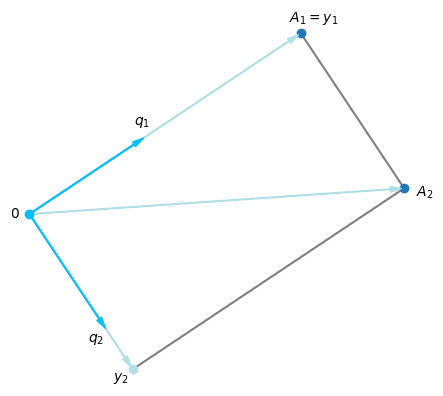

In [15]:
img_gramschmidt()

the result of gram-schmidt orthogonalization can be put into matrix form by introducing new notation for the dot products in the above calculation. deﬁne $r_{jj} = ||y_j||_2$ and $r_{ij} = q_i^TA_j$. then

\begin{align}
  A_1 &= r_{11}q_1 \\
  A_2 &= r_{12}q_1 + r_{22}q_2 \\
  \\
  &\Downarrow \\
  \\
  A_j &= r_{1j}q_1 + \dots + r_{j-1,j}q_{j-1} + r_{jj}q_j \\
  \\
  &\Downarrow \\
  \\
  (A_1|\dots|A_n) &= (q_1|\dots|q_n)
  \begin{bmatrix}
    r_{11} & r_{12} & \dots & r_{1n} \\
    & r_{22} & \dots & r_{2n} \\
    & & \ddots & \vdots \\
    & & & r_{nn}
  \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  A &= QR,
\end{align}

where $A$ is matrix consisting of columns $A_j$. this is <b>reduced QR factorization</b>. the assumption that vectors $A_j$ are linearly independent guarantees that the main diagonal coefficients $r_{jj}$ are nonzero. conversely, if $A_j$ lies in span of $A_1,\dots,A_{j-1}$, then the projections onto the latter vectors make up the entire vector and $r_{jj} = ||y_j||_2 = 0$.

##### example 12

find reduced QR factorization by applying gram-schmidt orthogonalization to

$$A = \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}.$$

\begin{align}
  y_1 &= A_1 = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} \\ \\
  r_{11} &= ||y_1||_2 = \sqrt{1^2 + 2^2 + 2^2} = 3 \\ \\
  q_1 &= \frac{y_1}{||y_1||_2} =
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \\
  \\
  y_2 &= A_2 - q_1\underbrace{q_1^TA_2}_{r_{12}} =
  \begin{bmatrix} -4 \\ 3 \\ 2 \end{bmatrix} -
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \cdot 2 =
  \begin{bmatrix}
    -\frac{14}{3} \\ \frac{5}{3} \\ \frac{2}{3}
  \end{bmatrix} \\ \\
  r_{22} &= ||y_2||_2 = 5 \\ \\
  q_2 &= \frac{y_2}{||y_2||_2} = \frac{1}{5}
  \begin{bmatrix}
    -\frac{14}{3} \\ \frac{5}{3} \\ \frac{2}{3}
  \end{bmatrix} =
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix} \\
  \\
  &\quad\Downarrow \\
  \\
  A &=
  \begin{bmatrix}
    1 & -4 \\ 2 & 3 \\ 2 & 2
  \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{5} \\
    \frac{2}{3} & \frac{1}{3} \\
    \frac{2}{3} & \frac{2}{15}
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \end{bmatrix} = QR.
\end{align}

##### algorithm <b>classical gram-schmidt orthogonalization</b>

```
# a[j], j = 1,2,...,n linearly independent vectors

for j = 1:n
  y = A[j]
  for i = 1:j-1
    r[i,j] = transpose(q[i])·A[j]
    y = y - r[i,j]q[i]
  end
  r[j,j] = ||y|| # L2 norm
  q[j] = y/r[j,j]
end
```

##### usw

when method successful, it is customary to ﬁll out the matrix of orthogonal unit vectors to a complete basis of $\mathbb{R}^m$, to achieve the "full" QR factorization. this can be done by adding $m-n$ extra vectors to the $A_j$, so that $m$ vectors span $\mathbb{R}^m$ and carrying out gram–schmidt. in terms of the basis of $\mathbb{R}^m$ formed by $q_1,\dots,q_m$, the original vectors can be expressed as

$$
(A_1|\dots|A_n) = (q_1|\dots|q_m)
  \begin{bmatrix}
    r_{11} & r_{12} & \dots & r_{1n} \\
    & r_{22} & \dots & r_{2n} \\
    & & \ddots & \vdots \\
    & & & r_{nn} \\
    0 & \dots & \dots & 0 \\
    \vdots &&& \vdots \\
    0 & \dots & \dots & 0
  \end{bmatrix}.
$$

this is full QR factorization of the matrix $A = (A_1|\dots|A_n)$, formed by the original input vectors. note the matrix sizes in the full QR factorization: $A$ is $m\times n$, $Q$ is a square $m\times m$ matrix, and upper triangular matrix $R$ is $m\times n$, the same size as $A$. matrix $Q$ in the full QR factorization has a special place in numerical analysis and is given a special deﬁnition.

##### <b><font color=grey>definition 01</font></b>

square matrix $Q$ is <b>orthogonal</b> if $Q^T = Q^{-1}$.

note that a square matrix is orthogonal iif its columns are pairwise orthogonal unit vectors. therefore, a full QR factorization is the equation $A = QR$, where $Q$ is an orthogonal square matrix and $R$ is an upper triangular matrix the same size as $A$.

the key property of an orthogonal matrix is that it preserves the euclidean norm of a vector.

##### <b><font color=grey>lemma 02</font></b>

if $Q$ is an orthogonal $m\times m$ matrix and $x$ is an $m$-dimensional vector, then $||Qx||_2 = ||x||_2$.

the product of two orthogonal $m\times m$ matrices is again orthogonal. the QR factorization of an $m\times m$ matrix by gram-schmidt method requires approximately $m^3$ multiplication/divisions, three times more than LU factorization and about the same number of additions.

##### example 13

continues example 12.

find the full QR factorization of $A= \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2& 2 \end{bmatrix}$.

\begin{align}
  q_1 &= \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix}, \quad q_2 =
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix}, \quad\text{previously} \\
  \\
  &\Downarrow \quad\text{add }A_3 = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^T \\
  \\
  y_3 &= A_3 - q_1q_1^TA_3 - q_2q_2^TA_3 \\
  \\
  &= \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} -
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \frac{1}{3} -
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix} (-\frac{14}{15})
  = \frac{2}{225} \begin{bmatrix} 2 \\ 10 \\ -11 \end{bmatrix} \\
  \\
  q_3 &= \frac{y_3}{||y_3||_2} = \begin{bmatrix}
    \frac{2}{15} \\ \frac{10}{15} \\ -\frac{11}{15}
  \end{bmatrix} \\
  \\
  &\Downarrow \quad r_{11} = 3, r_{12} = 2, r_{22} = 5, \quad\text{previously} \\
  \\
  A &= \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{15} & \frac{2}{15} \\
    \frac{2}{3} & \frac{1}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{2}{15} & -\frac{11}{15} \\
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = QR
\end{align}

In [ ]:
# example 12

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html

# see miscellaney for commentary on signs

if __name__ == "__main__":
  import numpy as np

  a = np.array([[1,-4],[2,3],[2,2]])
  q,r = np.linalg.qr(a)
  print(f"\nA:\n{a}")
  print(f"\nQ:\n{q}")
  print(f"\nR:\n{r}")



A:
[[ 1 -4]
 [ 2  3]
 [ 2  2]]

Q:
[[-0.33333333  0.93333333]
 [-0.66666667 -0.33333333]
 [-0.66666667 -0.13333333]]

R:
[[-3. -2.]
 [ 0. -5.]]


and then what?

like LU, QR can solve a system of equations:

$$Ax = b \Rightarrow QRx = b \Rightarrow Rx = Q^Tb.$$

but its way more expensive, so dont do it. but its technically an option.

more immediately, that non-square $A$ might fit in with least squares.

let $A$ be $m\times n$ matrix with $m\ge n$. to minimize $\|Ax-b||_2$, rewrite as $||QRx - b||_2 = ||Rx - Q^Tb||_2$ by lemma 02. the euclidean norm as its matrix self,

$$
\begin{bmatrix}
  e_1 \\ \vdots \\ e_n \\ -- \\ e_{n+1} \\ \vdots \\ e_m
\end{bmatrix} =
\begin{bmatrix}
  r_{11} & r_{12} & \dots & r_{1n} \\
  & r_{22} & \dots & r_{2n} \\
  && \ddots & \vdots \\
  &&& r_{nn} \\
  -- & -- & -- & -- \\
  0 & \dots & \dots & 0 \\
  \vdots &&& \vdots \\
  0 & \dots & \dots & 0
\end{bmatrix} \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} -
\begin{bmatrix}
  d_1 \\ \vdots \\ d_n \\ -- \\ d_{n+1} \\ \vdots \\ d_m
\end{bmatrix}
$$

where $d = Q^Tb$. assume $r_{ij\ne 0}$. the upper part of $e$ can be zeroed through back substitution and $x_i$ is irrelevant for remaining equations. ie, $(e_{n+1},\dots,e_m) = (-d_{n+1},\dots,-d_m)$. ie, least squares solution is minimized by using $x$ from back-solving and the least squares error is $||e||_2 = d_{n+1}^2 + \dots + d_m^2$.

###### algorithm <b>least squares by QR factorization</b>

1. given $m\times n$ inconsistent system, $Ax = b$,
2. find full QR factorization $A=QR$ and set</br>
$\hat{R} =$ upper $n\times n$ submatrix of $R$,</br>
$\hat{d} =$ upper $n$ entries of $d = Q^Tb$.
3. solve $\hat{R}\bar{x} = \hat{d}$ for least squares solution $\bar{x}$.

##### example 14

continues example 13.

use full QR factorization to solve the least squares problem

$$
\begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} =
\begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix}.
$$

\begin{align}
  Rx &= Q^Tb \\
  \\
  &\Downarrow \\
  \\
  Q &= \begin{bmatrix}
    5 & -14 & 2 \\
    10 & 5 & 10 \\
    10 & 2 & -11
  \end{bmatrix}, \quad
  R = \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ -- & -- \\ 0 & 0 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &= \frac{1}{15}
  \begin{bmatrix} 5 & 10 & 10 \\ -14 & 5 & 2 \\ 2 & 10 & -11 \end{bmatrix} \begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix} =
  \begin{bmatrix} 15 \\ 9 \\ -- \\ 3 \end{bmatrix}.
\end{align}

least squares error $||e||_2 = ||(0,0,3)||_2 = 3$ and for $\bar{x}$

$$
\begin{bmatrix} 3 & 2 \\ 0 & 5 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 15 \\ 9 \end{bmatrix}
\quad\Rightarrow\quad
\bar{x} = \begin{bmatrix} 3.8 \\ 1.8 \end{bmatrix}.
$$

In [ ]:
# verified resource

if __name__ == "__main__":
  import numpy as np

  ys = np.array([-3,15,9])
  a = np.array([[1,-4],[2,3],[2,2]])
  q,r = np.linalg.qr(a)  #\\\,mode='complete')
  print(f"\nA:\n{a}")
  print(f"\nQ:\n{q}")
  print(f"\nR:\n{r}")

  d = q.T@ys # b = ys
  x = np.linalg.solve(r,d)
  print(f"\nx:\n{x}")



A:
[[ 1 -4]
 [ 2  3]
 [ 2  2]]

Q:
[[-0.33333333  0.93333333]
 [-0.66666667 -0.33333333]
 [-0.66666667 -0.13333333]]

R:
[[-3. -2.]
 [ 0. -5.]]

x:
[3.8 1.8]


##### example 15

revisits example 05, van der monde.

In [8]:
eg_15()


LSQ: [1.00000036 0.99999912 1.00000091 0.99999948 1.00000018 0.99999996
 1.         1.        ] = meh

bc cond(vdm): 5408707369.66

 QR: [1.00000015 0.99999961 1.00000041 0.99999976 1.00000008 0.99999998
 1.         1.        ] = oh, alright

err: 0.0 = fancy

bc cond(ata): 5408707240.83


## 2 modified gram-schmidt orthogonalization

##### algorithm <b>modified gram-schmidt orthogonalization</b>

this is computational tweak that doesnt change the mathematical equivalent: replace $A_j$ with $y$ in the innermost loop.

```
# a[j], j=1,2,...,n linearly independent vectors

for j = 1:n
  y = a[j]
  for i = 1:j-1
    r[i,j] = transpose(q[i])·y
    y = y - r[i,j]q[i]
  end
  r[j,j] = ||y|| # L2 norm
  q[j] = y/r[j,j]
```

when projecting away the part of vector $A_j$ in the direction of $q_i$, subtract away the projection of the remainder $y$ of $A_j$ with the $q_{i-1}$ part already removed, instead of the projection of $A_j$ itself on $q_i$.

## 3 householder reflectors

modified improves on classical and householder reﬂectors beats the mod. it requires fewer operations and is more stable, in the sense of ampliﬁcation of rounding errors.

a household reflector is an orthogonal matrix that reﬂects all $m$-vectors through an $m-1$ dimensional plane. this means that the length of each vector is unchanged when multiplied by the matrix, making householder reﬂectors ideal for moving vectors. given a vector $x$ relocate to a vector $w$ of equal length, householder reﬂector matrix $H$ such that $Hx = w$.

draw the $m-1$ dimensional plane bisecting $x$ and $w$, then reﬂect all vectors through the plane.

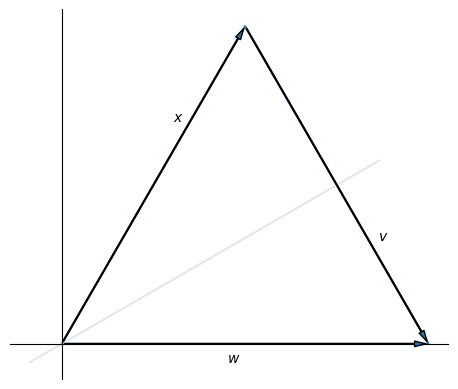

In [16]:
img_householder()

##### lemma 03

assume $x,w$ are vectors of the same euclidean length, $||x||_2 = ||w||_2$. then $w-x$ and $w+x$ are perpendicular.

##### usw

define vector $v = w-x$ and consider the projection matrix

$$P = \frac{vv^T}{v^Tv}.$$

a <b>projection matrix</b> is a matrix that satisﬁes $P^2 = P$.

geometrically, for any vector $u$, $Pu$ is the projection of $u$ onto $v$. subtract twice the projection $Px$ from $x$ to get $w$. to verify this, set $H = I-2P$. then

\begin{align}
  Hx &= x - 2Px \\
  &= w - v - \frac{2vv^Tx}{v^Tv} \\
  &= w - v - \frac{vv^Tx}{v^Tv} - \frac{vv^T(w-v)}{v^Tv} \\
  &= w - \frac{2vv^T(w+x)}{v^Tv} \\
  \\
  &\Downarrow \quad\text{by lemma 03} \\
  \\
  &= w \quad\checkmark.
\end{align}

$H$ is called a <b>householder reflector</b>.

##### <b><font color=grey>theorem 04</font> householder reflectors</b>

let $x,w$ be vectors with $||x||_2 = ||w||_2$ and define $v=w-x$. then $H = I - 2vv^T/v^Tv$ is symmmetric orthogonal matrix and $Hx=w$.

##### example 17

let $x = [3,4], w = [5,0]$. find householder reflector $h$ that satisfies $Hx = w$.

\begin{align}
  v &= w-x =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} -
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} =
  \begin{bmatrix} 2 \\ -4 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  P &= \frac{vv^T}{v^Tv} = \frac{1}{20}
  \begin{bmatrix} 4 & -8 \\ -8 & 16 \end{bmatrix} =
  \begin{bmatrix} 0.2 & -0.4 \\ -0.4 & 0.8 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  H = I - 2P &= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} -
  \begin{bmatrix} 0.4 & -0.8 \\ -0.8 & 1.6 \end{bmatrix} =
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{verify} \\
  \\
  Hx &= \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} = w \\
  \\
  Hw &= \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} =
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} = x \quad\checkmark
\end{align}

##### usw

what was the point of gram-schmidt? to get QR. what is the point of householder? to get QR. specifically, reﬂectors will move a column vector $x$ to a coordinate axis as a way of putting zeros into a matrix -- ie, the $R$ of QR.

for $A$ decomposed into $QR$, let $x$ be its first column. let $w = \pm(||A_1||_2,0,\dots,0)$ be a vector along the first coordinate axis of identical euclidean length. (either sign works in theory but choose sign opposite to first component for numerical stability.) create householder reflector $H_1$ such that $H_1x = w$. eg, for $A_{4\times 3}$,

$$
H_1A = H_1
\begin{bmatrix}
  x & x & x \\
  x & x & x \\
  x & x & x \\
  x & x & x
\end{bmatrix}
=
\begin{bmatrix}
  x & x & x \\
  0 & x & x \\
  0 & x & x \\
  0 & x & x
\end{bmatrix}.
$$

so $H_1$ enabled some RHS zeros. so maybe do that some more.

\begin{align}
  \begin{pmatrix}
    1 & | & 0 & 0 & 0 \\
    - & - & - & - & - \\
    0 & | \\
    0 & | && \hat{H}_2 \\
    0 & |
  \end{pmatrix}
  \begin{pmatrix}
    x & | & x & x \\
    - & - & - & - \\
    0 & | & x & x \\
    0 & | & x & x \\
    0 & | & x & x
  \end{pmatrix}
  &=
  \begin{pmatrix}
    x & | & x & x \\
    - & - & - & - \\
    0 & | & x & x \\
    0 & | & 0 & x \\
    0 & | & 0 & x
  \end{pmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{pmatrix}
    1 & 0 & | & 0 & 0 \\
    0 & 1 & | & 0 & 0 \\
    - & - & - & - & - \\
    0 & 0 & | \\
    0 & 0 & | && \hat{H}_3
  \end{pmatrix}
  \begin{pmatrix}
    x & x & | & x \\
    0 & x & | & x \\
    - & - & - & - \\
    0 & 0 & | & x \\
    0 & 0 & | & x
  \end{pmatrix}
  &=
  \begin{pmatrix}
    x & x & | & x \\
    0 & x & | & x \\
    - & - & - & - \\
    0 & 0 & | & x \\
    0 & 0 & | & 0
  \end{pmatrix} \\
  \\
  &\Downarrow \\
  \\
  H_3H_2H_1A &= R \\
  \\
  A = H_1H_2H_3R &= QR.
\end{align}

note $H_i^T = H_i$ bc $H_i$ is symmetric orthogonal.

##### example 18

use householder reflectors to find QR factorization of

$$A = \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}.$$

find householder reflector that moves first column $[3,4]$ onto $x$-axis. from example 17,

\begin{align}
  H_1A &=
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}
  =
  \begin{bmatrix} 5 & 3 \\ 0 & -1 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{multiply both sides on left by }H_1^{-1} = H_1 \\
  \\
  A &=
  \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}
  =
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 5 & 3 \\ 0 & -1 \end{bmatrix}
  = QR \quad\text{ where } Q = H_1^T = H_1.
\end{align}

##### example 19

continues example 17.

use householder reflectors to find QR factorization of

$$A = \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}.$$

find householder reflector that moves first column $[1,2,2]$ to vector $w = [||x||_2,0,0]$. set $v = w-x = [3,0,0] - [1,2,2] = [2,-2,-2]$.

\begin{align}
  H_1 &=
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1
  \end{bmatrix} - \frac{2}{12}
  \begin{bmatrix}
    4 & -4 & -4 \\ -4 & 4 & 4 \\ -4 & 4 & 4
  \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix} \quad\text{by theorem 04} \\
  \\
  H_1A &=
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  =
  \begin{bmatrix} 3 & 2 \\ 0 & -3 \\ 0 & -4 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{move }\hat{x}=[-3,-4]\rightarrow \hat{w}[5,0]\text{ with }H_2\text{ from examples 17,18} \\
  \\
  H_2 \hat{x} &=
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} -3 \\ -4 \end{bmatrix}
  =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} = \hat{w} \\
  \\
  &\Downarrow \\
  \\
  H_2H_1A &=
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 0.6 & 0.8 \\ 0 & 0.8 & -0.6
  \end{bmatrix}
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  =
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = R \\
  \\
  &\Downarrow \quad\text{multiply both sides on left by }H_1^{-1}H_2^{-1} = H_1H_2 \\
  \\
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  &= H_1H_2R =
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 0.6 & 0.8 \\ 0 & 0.8 & -0.6
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} \\
  \\
  &=
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{15} & -\frac{2}{15} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & \frac{2}{15} & \frac{11}{15}
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = QR.
\end{align}

householder reflection costs $\frac{2}{3}m^3$ multiplications and the same number of additions -- lower than gram-schmidt orthogonalization. householder also delivers better orthogonality and requires less memory. however, for large matrices, householder reflection is complicated in costly ways - which is why numpy and scipy use modified gram-schmidt.

###### code

In [ ]:
# 240308 ksa  lol = not yet, check next semester. but theres a decent python
#             link miscellaney for young students who dont like to relax.


### miscellaney

* gram-schmidt [@khan](https://www.youtube.com/watch?v=rHonltF77zI) (19m)
* QR decomposition [@brightside](https://www.youtube.com/watch?v=FAnNBw7d0vg) (14m)
* same thing [@leahhoward](https://www.youtube.com/watch?v=qmRC8mTPGI8) (8:30m)
* householder QR factorization [@santa](https://www.youtube.com/watch?v=5MeeuSoFBdY) (5m) [@kutz](https://www.youtube.com/watch?v=gvnFVCWI044) (46:30m)
* householder, python [@quantstart](https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/)

<b>libraries</b>
* qr-factorization [@numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)

<b>some quirks</b>

* [why so negative?](https://scipy-user.scipy.narkive.com/FkwGgR1O/qr-decompostion-gives-negative-q-r)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
